In [1]:
import glob
import os
import re
import pickle
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from functools import reduce
from msmbuilder.utils import io
import math
from matplotlib import rc
from matplotlib.font_manager import FontProperties

/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from matplotlib.colors import ListedColormap
purple=tuple(['#6247aa','#815ac0','#a06cd5','#b185db','#d2b7e5'])
blue=tuple(['#2c7da0','#468faf','#61a5c2','#89c2d9','#a9d6e5'])
green=tuple(['#718355', '#87986a', '#97a97c', '#a3b18a', '#cfe1b9'])
orange=tuple(['#ffb700','#ffc300','#ffd000','#ffdd00','#ffea00'])
red=tuple(['#f25c54', '#f4736c', '#f27059', '#f4845f', '#f79d65'])
larger=tuple(['#f7b267','#f7b267','#f7b267','#f7b267','#f7b267'])
colors = purple+blue+green+orange+red+larger
cmap = ListedColormap(colors)

In [3]:
from matplotlib.colors import ListedColormap
purple=tuple(['#6247aa','#815ac0','#a06cd5','#b185db','#d2b7e5'])
blue=tuple(['#2c7da0','#468faf','#61a5c2','#89c2d9','#a9d6e5'])
green=tuple(['#718355', '#87986a', '#97a97c', '#a3b18a', '#cfe1b9'])
orange=tuple(['#ffb700','#ffc300','#ffd000','#ffdd00','#ffea00'])
red=tuple(['#f25c54', '#f27059', '#f4845f', '#f79d65', '#f7b267'])
larger=tuple(['#f7b267','#f7b267','#f7b267','#f7b267','#f7b267'])
colors = purple+blue+green+orange+red+larger
cmap = ListedColormap(colors)

#### Apo

In [4]:
apo_counts =  np.loadtxt("apo_count_mat.dat") 
apo_eq     = np.loadtxt("apo_msm_eq_pop.dat")
apo_dat1 = np.load("apo_data_x.npy", allow_pickle=True)*10 
apo_dat2 = np.load("apo_data_y.npy", allow_pickle=True)*10

/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


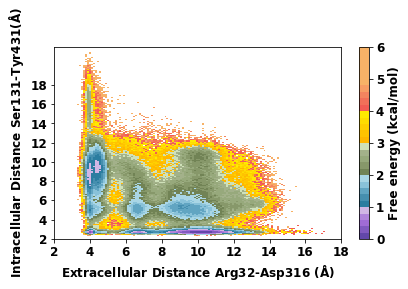

In [5]:
xmax=22
xmin=0
ymax=22
ymin=0

bin_size = 200

i=0 
hists = np.zeros((bin_size, bin_size))
for i in range(len(apo_eq)):
    hist  = np.histogram2d( apo_dat1[i], apo_dat2[i], bins=bin_size, range=[ [ymin, xmax], [ymin, ymax] ])[0]
    hists = hists + hist * apo_eq[i] / len(apo_dat1[i])  
energy = -0.6*np.log(hists) - np.min(np.hstack(-0.6*np.log(hists)))
energy = np.transpose(energy)

import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': '12', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

ax0 = plt.subplot()

c=ax0.imshow(energy, extent=[0, xmax, 0, ymax], origin='lower', aspect='auto', cmap=cmap, vmin=0, vmax=6, interpolation='nearest')
ax0.set_xlim(2,18)
ax0.set_ylim(2,22)
ax0.set_xticks((2,4,6,8,10,12,14,16,18))
ax0.set_yticks((2,4,6,8,10,12,14,16,18))
ax0.set_xlabel(r'Extracellular Distance Arg32-Asp316 (${\AA}$)', fontweight="bold")
ax0.set_ylabel(r"Intracellular Distance Ser131-Tyr431(${\AA}$)", fontweight="bold")
cbar = plt.colorbar(c,ticks=[0,1,2,3,4,5,6])
cbar.ax.set_ylabel('Free energy (kcal/mol)', fontweight="bold")


plt.tight_layout()
#plt.savefig("pep-MSM-landscape.svg", dpi=600, bbox_inches='tight')

#### Holo (Gates)

In [6]:
holo_eq     = np.loadtxt("MSM-landscape/msm_eq_pop.dat")
hologates_counts = np.loadtxt("hologates_count_mat.dat") 
hologates_dat1 = np.load("hologates_data_x.npy", allow_pickle=True)*10 
hologates_dat2 = np.load("hologates_data_y.npy", allow_pickle=True)*10

/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


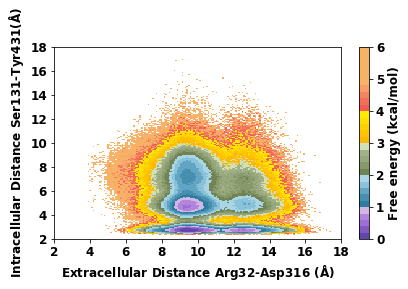

In [7]:
xmax=18
xmin=0
ymax=18
ymin=0

bin_size = 200

i=0 
hists = np.zeros((bin_size, bin_size))
for i in range(len(holo_eq)):
    hist  = np.histogram2d( hologates_dat1[i], hologates_dat2[i], bins=bin_size, range=[ [ymin, xmax], [ymin, ymax] ])[0]
    hists = hists + hist * holo_eq[i] / len(hologates_dat1[i])  
energy = -0.6*np.log(hists) - np.min(np.hstack(-0.6*np.log(hists)))
energy = np.transpose(energy)

import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': '12', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

ax0 = plt.subplot()

c=ax0.imshow(energy, extent=[0, xmax, 0, ymax], origin='lower', aspect='auto', cmap=cmap, vmin=0, vmax=6, interpolation='nearest')
ax0.set_xlim(2,18)
ax0.set_ylim(2,18)
ax0.set_xticks((2,4,6,8,10,12,14,16,18))
ax0.set_yticks((2,4,6,8,10,12,14,16,18))
ax0.set_xlabel(r'Extracellular Distance Arg32-Asp316 (${\AA}$)', fontweight="bold")
ax0.set_ylabel(r"Intracellular Distance Ser131-Tyr431(${\AA}$)", fontweight="bold")
cbar = plt.colorbar(c,ticks=[0,1,2,3,4,5,6])
cbar.ax.set_ylabel('Free energy (kcal/mol)', fontweight="bold")

plt.tight_layout()

#### Holo (tics)

In [8]:
holo_eq     = np.loadtxt("MSM-landscape/msm_eq_pop.dat")
holotic_counts = np.loadtxt("holotic_count_mat.dat") 
holotic_dat1 = np.load("holotic_data_x.npy", allow_pickle=True) 
holotic_dat2 = np.load("holotic_data_y.npy", allow_pickle=True)

/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


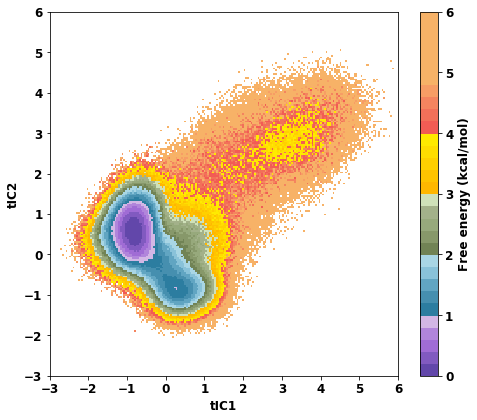

In [9]:
xmax=6
ymax=6
xmin=-3
ymin=-3
bin_size = 200

i=0 
hists = np.zeros((bin_size, bin_size))
for i in range(len(holo_eq)):
    hist  = np.histogram2d( holotic_dat1[i], holotic_dat2[i], bins=bin_size, range=[ [xmin, xmax], [ymin, ymax] ])[0]
    hists = hists + hist * holo_eq[i] / len(holotic_dat1[i])  
energy = -0.6*np.log(hists) - np.min(np.hstack(-0.6*np.log(hists)))
energy = np.transpose(energy)

import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': '12', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

fig, ax0 = plt.subplots()
fig.set_size_inches(7, 6)

c=ax0.imshow(energy, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto', cmap=cmap, vmin=0, vmax=6, interpolation='nearest')

ax0.set_xlim(xmin,xmax)
ax0.set_ylim(ymin,ymax)

ax0.set_xlabel('tIC1', fontweight="bold")
ax0.set_ylabel('tIC2', fontweight="bold")
cbar = plt.colorbar(c,ticks=[0,1,2,3,4,5,6])
cbar.ax.set_ylabel('Free energy (kcal/mol)', fontweight="bold")


plt.tight_layout()

#### Plot Errors

In [10]:
import numpy as np
import pickle
from matplotlib import cm

counts = np.loadtxt("hologates_count_mat.dat")
dat1 = np.load("hologates_data_x.npy", allow_pickle=True)*10
dat2 = np.load("hologates_data_y.npy", allow_pickle=True)*10

from msmbuilder.utils import io
msm = io.load('/mnt/ds04/Peptso/msm_objects/holo/MSM-errorbar.pkl')

xmax=18
xmin=0
ymax=18
ymin=0

bin_size = 200

freeE = []
for eq in msm.all_populations_:
  hcounts = np.ceil(counts/2)
  ndat1   = []
  ndat2   = []
  for i in range(len(dat1)):
    ndat1.append(np.random.choice(dat1[i], size=int(hcounts[i])))
    ndat2.append(np.random.choice(dat2[i], size=int(hcounts[i])))

  hists = np.zeros((bin_size, bin_size))
  for i in range(len(eq)):
    hist  = np.histogram2d( ndat1[i], ndat2[i], bins=bin_size, range=[ [0, xmax], [0, ymax] ])[0]
    hists = hists + hist * eq[i] / len(ndat1[i])
  energy = -0.6*np.log(hists) - np.min(np.hstack(-0.6*np.log(hists)))
  energy = np.transpose(energy)
  freeE.append(energy)

errors = np.std(freeE, axis=0)

/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


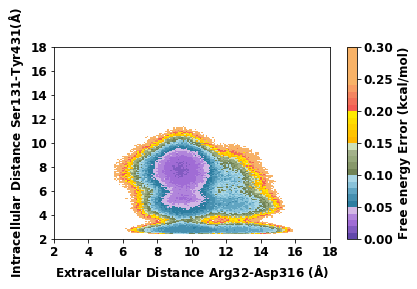

In [30]:
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from matplotlib import ticker
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': '12', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

ax0 = plt.subplot()

c=ax0.imshow(errors, extent=[0, xmax, 0, ymax], origin='lower', aspect='auto', cmap=cmap, vmin=0, vmax=0.3, interpolation='nearest')
ax0.set_xlim(2,18)
ax0.set_ylim(2,18)
ax0.set_xticks((2,4,6,8,10,12,14,16,18))
ax0.set_yticks((2,4,6,8,10,12,14,16,18))
ax0.set_xlabel(r'Extracellular Distance Arg32-Asp316 (${\AA}$)', fontweight="bold")
ax0.set_ylabel(r"Intracellular Distance Ser131-Tyr431(${\AA}$)", fontweight="bold")
cbar = plt.colorbar(c,
                    #ticks=[0,1,2,3,4,5,6]
                   )
cbar.ax.set_ylabel('Free energy Error (kcal/mol)', fontweight="bold")
tick_locator = ticker.MaxNLocator(nbins=6)
cbar.locator = tick_locator
cbar.update_ticks()

plt.tight_layout()
plt.savefig("hologates_msm_errors.svg", dpi=600, bbox_inches='tight')

#### Error Holotics

In [38]:
import numpy as np
import pickle
from matplotlib import cm

counts = np.loadtxt("holotic_count_mat.dat")
dat1 = np.load("holotic_data_x.npy", allow_pickle=True)
dat2 = np.load("holotic_data_y.npy", allow_pickle=True)

from msmbuilder.utils import io
msm = io.load('/mnt/ds04/Peptso/msm_objects/holo/MSM-errorbar.pkl')

xmax=6
xmin=-3
ymax=6
ymin=-3

bin_size = 200

freeE = []
for eq in msm.all_populations_:
  hcounts = np.ceil(counts/2)
  ndat1   = []
  ndat2   = []
  for i in range(len(dat1)):
    ndat1.append(np.random.choice(dat1[i], size=int(hcounts[i])))
    ndat2.append(np.random.choice(dat2[i], size=int(hcounts[i])))

  hists = np.zeros((bin_size, bin_size))
  for i in range(len(eq)):
    hist  = np.histogram2d( ndat1[i], ndat2[i], bins=bin_size, range=[ [xmin, xmax], [ymin, ymax] ])[0]
    hists = hists + hist * eq[i] / len(ndat1[i])
  energy = -0.6*np.log(hists) - np.min(np.hstack(-0.6*np.log(hists)))
  energy = np.transpose(energy)
  freeE.append(energy)

errors = np.std(freeE, axis=0)

/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


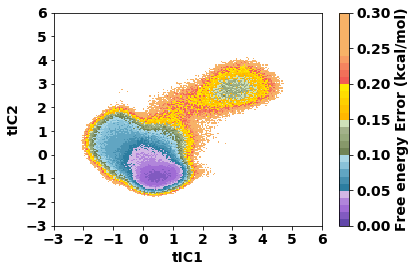

In [52]:
import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': '14', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('14')

ax0 = plt.subplot()

c=ax0.imshow(errors, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto', cmap=cmap, vmin=0, vmax=0.3, interpolation='nearest')
ax0.set_xlim(-3,6)
ax0.set_ylim(-3,6)
ax0.set_xticks((-3,-2,-1,0,1,2,3,4,5,6))
ax0.set_yticks((-3,-2,-1,0,1,2,3,4,5,6))
ax0.set_xlabel(r'tIC1', fontweight="bold")
ax0.set_ylabel(r"tIC2", fontweight="bold")
cbar = plt.colorbar(c,
                    #ticks=[0,1,2,3,4,5,6]
                   )
cbar.ax.set_ylabel('Free energy Error (kcal/mol)', fontweight="bold")
tick_locator = ticker.MaxNLocator(nbins=6)
cbar.locator = tick_locator
cbar.update_ticks()

plt.tight_layout()
plt.savefig("holotic_msm_errors.svg", dpi=600, bbox_inches='tight')

### apo error

In [33]:
import numpy as np
import pickle
from matplotlib import cm

counts = np.loadtxt("apo_count_mat.dat")
dat1 = np.load("apo_data_x.npy", allow_pickle=True)*10
dat2 = np.load("apo_data_y.npy", allow_pickle=True)*10

from msmbuilder.utils import io
msm = io.load('/mnt/ds04/Peptso/msm_objects/apo/MSM-errorbar.pkl')

In [34]:
xmax=22
xmin=0
ymax=22
ymin=0

bin_size = 200

freeE = []
for eq in msm.all_populations_:
  hcounts = np.ceil(counts/2)
  ndat1   = []
  ndat2   = []
  for i in range(len(dat1)):
    ndat1.append(np.random.choice(dat1[i], size=int(hcounts[i])))
    ndat2.append(np.random.choice(dat2[i], size=int(hcounts[i])))

  hists = np.zeros((bin_size, bin_size))
  for i in range(len(eq)):
    hist  = np.histogram2d( ndat1[i], ndat2[i], bins=bin_size, range=[ [0, xmax], [0, ymax] ])[0]
    hists = hists + hist * eq[i] / len(ndat1[i])
  energy = -0.6*np.log(hists) - np.min(np.hstack(-0.6*np.log(hists)))
  energy = np.transpose(energy)
  freeE.append(energy)

errors = np.std(freeE, axis=0)

/home/nicole/miniconda3/envs/msmbuilder/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


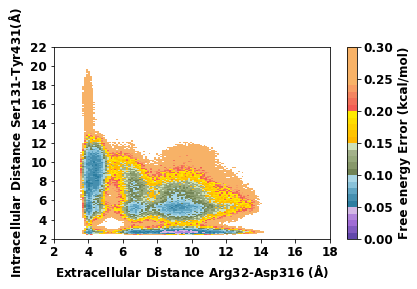

In [35]:
import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': '12', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('12')

ax0 = plt.subplot()

c=ax0.imshow(errors, extent=[0, xmax, 0, ymax], origin='lower', aspect='auto', cmap=cmap, vmin=0, vmax=0.3, interpolation='nearest')
ax0.set_xlim(2,18)
ax0.set_ylim(2,22)
ax0.set_xticks((2,4,6,8,10,12,14,16,18))
ax0.set_yticks((2,4,6,8,10,12,14,16,18,20,22))
ax0.set_xlabel(r'Extracellular Distance Arg32-Asp316 (${\AA}$)', fontweight="bold")
ax0.set_ylabel(r"Intracellular Distance Ser131-Tyr431(${\AA}$)", fontweight="bold")
cbar = plt.colorbar(c,
                    #ticks=[0,1,2,3,4,5,6]
                   )
cbar.ax.set_ylabel('Free energy Error (kcal/mol)', fontweight="bold")
tick_locator = ticker.MaxNLocator(nbins=6)
cbar.locator = tick_locator
cbar.update_ticks()


plt.tight_layout()
plt.savefig("apo_msm_errors.svg", dpi=600, bbox_inches='tight')